In [1]:
import matplotlib.pyplot as plt
import numpy as np

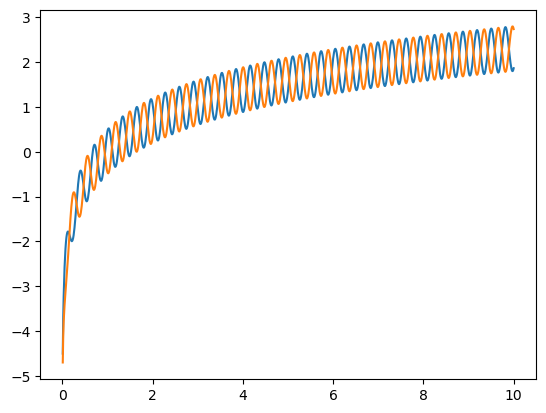

In [2]:
X = np.linspace(0.01, 10.0, 1_000)

Y_1 = np.log(X) + 0.5 * np.sin(20*X)
Y_2 = np.log(X) + 0.5 * np.sin(20*X+np.pi)

plt.plot(X, Y_1)
plt.plot(X, Y_2)

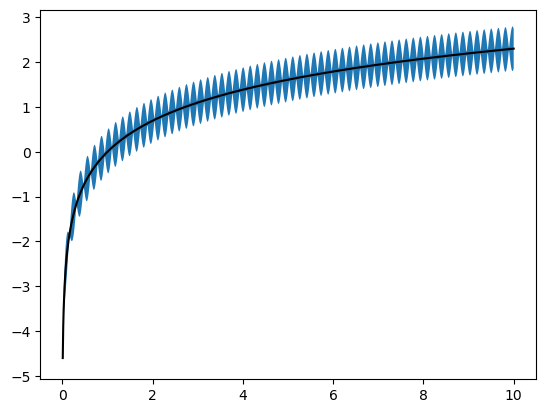

In [3]:
Y_mean = np.concatenate((Y_1[None], Y_2[None]), axis=0).mean(axis=0)
Y_std = np.concatenate((Y_1[None], Y_2[None]), axis=0).std(axis=0)

plt.plot(X, Y_mean, 'k-')
plt.fill_between(X, Y_mean-Y_std, Y_mean+Y_std)

In [4]:
import pandas as pd

## Linear Eval Full Data

In [5]:
df_tempo = pd.read_csv('../plots/runs_asl_full_tempo5.csv')
df_bl = pd.read_csv('../plots/runs_asl_full_baseline.csv')

In [6]:
X = df_tempo['Step']
Y_tempo = df_tempo['Value']
Y_bl = df_bl['Value']

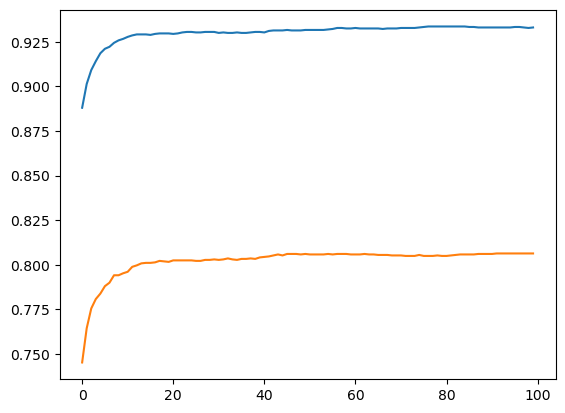

In [7]:
plt.plot(X, Y_tempo)
plt.plot(X, Y_bl)

## Linear Eval Few-Shot

In [20]:
dfs_bl = [pd.read_csv(f'../plots/linear_baseline/runs_baseline_{str(spc)}.csv').Value.to_numpy().max() for spc in [1,5,10,15,20]]
dfs_tp = [pd.read_csv(f'../plots/linear_tempo/runs_tempo_{str(spc)}.csv').Value.to_numpy().max() for spc in [1,5,10,15,20]]

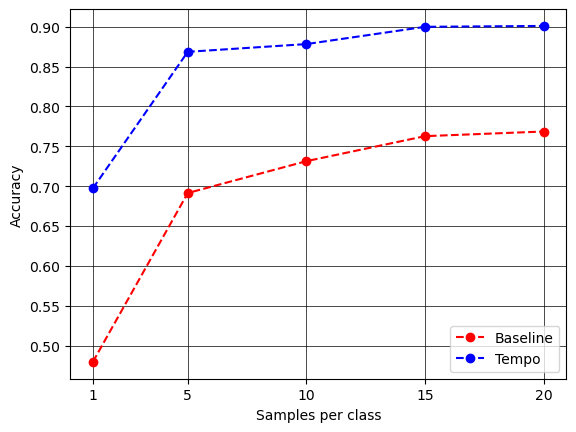

In [52]:
X = [1,5,10,15,20]
plt.xticks(X)
plt.yticks(np.arange(0.4, 1.0, 0.05))
plt.plot(X, dfs_bl, '--ro', label='Baseline')
plt.plot(X, dfs_tp, '--bo', label='Tempo')

plt.xlabel('Samples per class')
plt.ylabel('Accuracy')
plt.grid(color='black', linestyle='-', linewidth=0.5)

plt.legend()

## Semi-Supervised Few-Shot